<a href="https://colab.research.google.com/github/aloy4646/students-grade-classification/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi menggunakan Decision Tree

In [1]:
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/tubesML/student-por-preprocessed.csv')
dataset.head(10)

,higher_yes,school_MS,studytime,Medu,Fedu,reason_reputation,address_U,internet_yes,Mjob_teacher,sex_M,Fjob_teacher,Mjob_health,romantic_yes,G3
0,0.344648,-0.730381,0.083588,1.309206,1.539528,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,4.123292,-0.282389,-0.762908,11
1,0.344648,-0.730381,0.083588,-1.335010,-1.187916,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,11
2,0.344648,-0.730381,0.083588,-1.335010,-1.187916,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,12
3,0.344648,-0.730381,1.289120,1.309206,-0.278768,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,3.535752,1.308754,14
4,0.344648,-0.730381,0.083588,0.427801,0.630380,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,13
5,0.344648,-0.730381,0.083588,1.309206,0.630380,1.87963,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13
6,0.344648,-0.730381,0.083588,-0.453605,-0.278768,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13
7,0.344648,-0.730381,0.083588,1.309206,1.539528,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,4.123292,-0.282389,-0.762908,13
8,0.344648,-0.730381,0.083588,0.427801,-0.278768,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,17
9,0.344648,-0.730381,0.083588,0.427801,1.539528,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13


## Membagi data train dan test

In [4]:
X = dataset.drop('G3', axis=1)
y = dataset['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Membuat model

    Max Depth: Menentukan kedalaman maksimum dari tree. Semakin dalam tree, semakin kompleks dan kemungkinan overfitting.
    
    Min Samples Split: Menentukan jumlah minimum sampel yang dibutuhkan untuk melakukan split pada sebuah node. Semakin besar nilainya, semakin generalisasi model, namun semakin kecil, semakin spesifik model.

    Min Samples Leaf: Menentukan jumlah minimum sampel yang harus ada pada setiap leaf node. Semakin kecil nilai ini, semakin kompleks model, dan semakin besar, semakin generalisasi.

    Max Features: Menentukan jumlah fitur yang dipilih secara acak untuk setiap split pada sebuah node. Semakin kecil nilai ini, semakin sedikit fitur yang digunakan, dan semakin besar, semakin kompleks model.

    Criterion: Menentukan kriteria untuk memilih fitur terbaik pada setiap split, antara Gini impurity atau entropy.

    Max Leaf Nodes: Menentukan jumlah maksimum leaf node pada tree. Semakin kecil nilai ini, semakin generalisasi model, dan semakin besar, semakin kompleks.

    Class Weight: Menentukan bobot untuk setiap kelas pada dataset. Berguna untuk menangani dataset yang tidak seimbang.

### Model 1

#### Training

In [5]:
model1 = DecisionTreeClassifier(max_depth=5,class_weight=None)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [6]:
filename = '/content/drive/MyDrive/tubesML/modelDecisionTree-1.sav'
pickle.dump(model1, open(filename, 'wb'))

#### Testing

##### Testing dengan test data

In [7]:
y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Model 1')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 1
Accuracy: 0.37
Precision: 0.27
Recall: 0.33
F1 score: 0.27


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


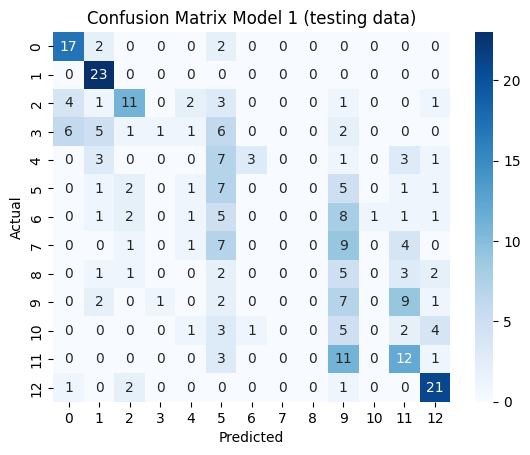

              precision    recall  f1-score   support

           0       0.61      0.81      0.69        21
           7       0.59      1.00      0.74        23
           8       0.55      0.48      0.51        23
           9       0.50      0.05      0.08        22
          10       0.00      0.00      0.00        18
          11       0.15      0.39      0.22        18
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        22
          14       0.00      0.00      0.00        14
          15       0.13      0.32      0.18        22
          16       0.00      0.00      0.00        16
          17       0.34      0.44      0.39        27
          18       0.64      0.84      0.72        25

    accuracy                           0.37       271
   macro avg       0.27      0.33      0.27       271
weighted avg       0.30      0.37      0.30       271



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model 1 (testing data)')
plt.show()
print(classification_report(y_test, y_pred))

##### Testing dengan train data, untuk mengecek overfitting

In [9]:
y_pred = model1.predict(X_train)

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='macro')
recall = recall_score(y_train, y_pred, average='macro')
f1 = f1_score(y_train, y_pred, average='macro')

print('Model 1')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 1
Accuracy: 0.41
Precision: 0.51
Recall: 0.42
F1 score: 0.36


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


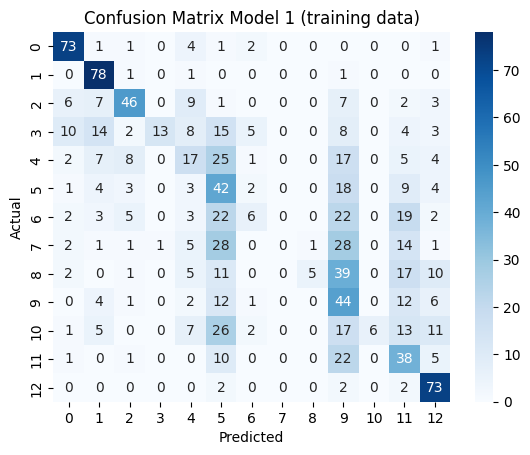

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        83
           7       0.63      0.96      0.76        81
           8       0.66      0.57      0.61        81
           9       0.93      0.16      0.27        82
          10       0.27      0.20      0.23        86
          11       0.22      0.49      0.30        86
          12       0.32      0.07      0.12        84
          13       0.00      0.00      0.00        82
          14       0.83      0.06      0.10        90
          15       0.20      0.54      0.29        82
          16       1.00      0.07      0.13        88
          17       0.28      0.49      0.36        77
          18       0.59      0.92      0.72        79

    accuracy                           0.41      1081
   macro avg       0.51      0.42      0.36      1081
weighted avg       0.51      0.41      0.35      1081



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model 1 (training data)')
plt.show()
print(classification_report(y_train, y_pred))

### Model 2

#### Training

In [11]:
model2 = DecisionTreeClassifier(max_depth=3,class_weight=None)
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
filename = '/content/drive/MyDrive/tubesML/modelDecisionTree-2.sav'
pickle.dump(model2, open(filename, 'wb'))

#### Testing

##### Testing dengan test data

In [13]:
y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='macro')
recall = recall_score(y_test, y_pred2, average='macro')
f1 = f1_score(y_test, y_pred2, average='macro')

print('Model 2')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 2
Accuracy: 0.28
Precision: 0.18
Recall: 0.25
F1 score: 0.18


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


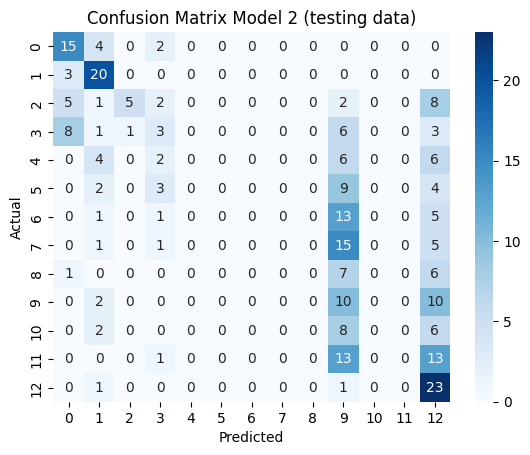

              precision    recall  f1-score   support

           0       0.47      0.71      0.57        21
           7       0.51      0.87      0.65        23
           8       0.83      0.22      0.34        23
           9       0.20      0.14      0.16        22
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        22
          14       0.00      0.00      0.00        14
          15       0.11      0.45      0.18        22
          16       0.00      0.00      0.00        16
          17       0.00      0.00      0.00        27
          18       0.26      0.92      0.40        25

    accuracy                           0.28       271
   macro avg       0.18      0.25      0.18       271
weighted avg       0.20      0.28      0.19       271



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model 2 (testing data)')
plt.show()
print(classification_report(y_test, y_pred2))

##### Testing dengan train data, untuk mengecek overfitting

In [15]:
y_pred2 = model2.predict(X_train)

accuracy = accuracy_score(y_train, y_pred2)
precision = precision_score(y_train, y_pred2, average='macro')
recall = recall_score(y_train, y_pred2, average='macro')
f1 = f1_score(y_train, y_pred2, average='macro')

print('Model 2')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 2
Accuracy: 0.28
Precision: 0.17
Recall: 0.28
F1 score: 0.18


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


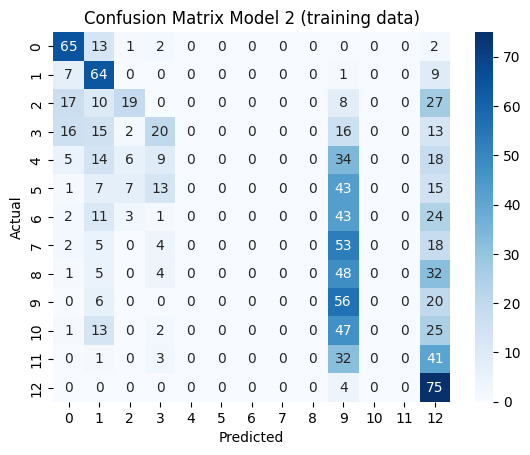

              precision    recall  f1-score   support

           0       0.56      0.78      0.65        83
           7       0.39      0.79      0.52        81
           8       0.50      0.23      0.32        81
           9       0.34      0.24      0.29        82
          10       0.00      0.00      0.00        86
          11       0.00      0.00      0.00        86
          12       0.00      0.00      0.00        84
          13       0.00      0.00      0.00        82
          14       0.00      0.00      0.00        90
          15       0.15      0.68      0.24        82
          16       0.00      0.00      0.00        88
          17       0.00      0.00      0.00        77
          18       0.24      0.95      0.38        79

    accuracy                           0.28      1081
   macro avg       0.17      0.28      0.18      1081
weighted avg       0.16      0.28      0.18      1081



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
sns.heatmap(confusion_matrix(y_train, y_pred2), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model 2 (training data)')
plt.show()
print(classification_report(y_train, y_pred2))

### Model 3

#### Training

In [17]:
model3 = DecisionTreeClassifier(max_depth=5,class_weight="balanced")
model3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [18]:
filename = '/content/drive/MyDrive/tubesML/modelDecisionTree-3.sav'
pickle.dump(model3, open(filename, 'wb'))

#### Testing

##### Testing dengan test data

In [19]:
y_pred3 = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
precision = precision_score(y_test, y_pred3, average='macro')
recall = recall_score(y_test, y_pred3, average='macro')
f1 = f1_score(y_test, y_pred3, average='macro')

print('Model 3')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 3
Accuracy: 0.37
Precision: 0.29
Recall: 0.34
F1 score: 0.29


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


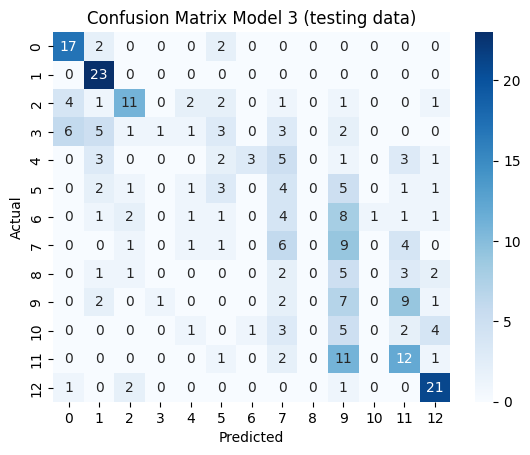

              precision    recall  f1-score   support

           0       0.61      0.81      0.69        21
           7       0.57      1.00      0.73        23
           8       0.58      0.48      0.52        23
           9       0.50      0.05      0.08        22
          10       0.00      0.00      0.00        18
          11       0.20      0.17      0.18        18
          12       0.00      0.00      0.00        20
          13       0.19      0.27      0.22        22
          14       0.00      0.00      0.00        14
          15       0.13      0.32      0.18        22
          16       0.00      0.00      0.00        16
          17       0.34      0.44      0.39        27
          18       0.64      0.84      0.72        25

    accuracy                           0.37       271
   macro avg       0.29      0.34      0.29       271
weighted avg       0.32      0.37      0.32       271



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model 3 (testing data)')
plt.show()
print(classification_report(y_test, y_pred3))

##### Testing dengan train data, untuk mengecek overfitting

In [21]:
y_pred3 = model3.predict(X_train)

accuracy = accuracy_score(y_train, y_pred3)
precision = precision_score(y_train, y_pred3, average='macro')
recall = recall_score(y_train, y_pred3, average='macro')
f1 = f1_score(y_train, y_pred3, average='macro')

print('Model 3')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 3
Accuracy: 0.41
Precision: 0.54
Recall: 0.42
F1 score: 0.37


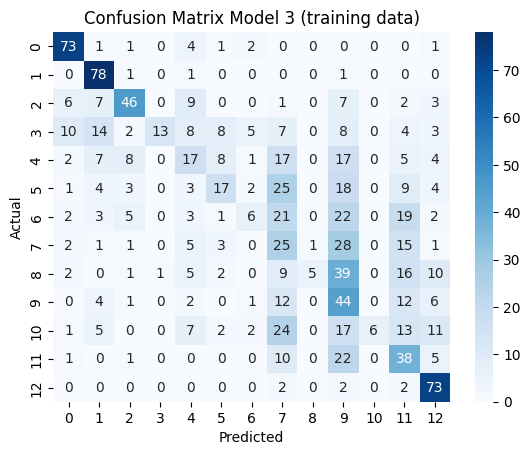

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        83
           7       0.63      0.96      0.76        81
           8       0.66      0.57      0.61        81
           9       0.93      0.16      0.27        82
          10       0.27      0.20      0.23        86
          11       0.40      0.20      0.27        86
          12       0.32      0.07      0.12        84
          13       0.16      0.30      0.21        82
          14       0.83      0.06      0.10        90
          15       0.20      0.54      0.29        82
          16       1.00      0.07      0.13        88
          17       0.28      0.49      0.36        77
          18       0.59      0.92      0.72        79

    accuracy                           0.41      1081
   macro avg       0.54      0.42      0.37      1081
weighted avg       0.54      0.41      0.37      1081



In [22]:
sns.heatmap(confusion_matrix(y_train, y_pred3), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model 3 (training data)')
plt.show()
print(classification_report(y_train, y_pred3))

### Model 4

#### Training

In [23]:
model4 = DecisionTreeClassifier(max_depth=3,class_weight="balanced")
model4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [24]:
filename = '/content/drive/MyDrive/tubesML/modelDecisionTree-4.sav'
pickle.dump(model4, open(filename, 'wb'))

#### Testing

##### Testing dengan test data

In [25]:
y_pred4 = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred4)
precision = precision_score(y_test, y_pred4, average='macro')
recall = recall_score(y_test, y_pred4, average='macro')
f1 = f1_score(y_test, y_pred4, average='macro')

print('Model 4')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 4
Accuracy: 0.28
Precision: 0.18
Recall: 0.25
F1 score: 0.18


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


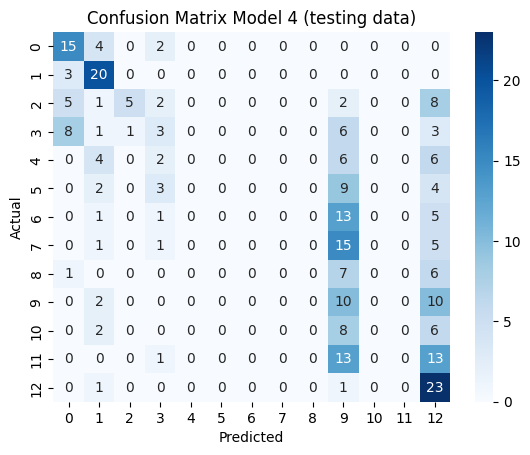

              precision    recall  f1-score   support

           0       0.47      0.71      0.57        21
           7       0.51      0.87      0.65        23
           8       0.83      0.22      0.34        23
           9       0.20      0.14      0.16        22
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        22
          14       0.00      0.00      0.00        14
          15       0.11      0.45      0.18        22
          16       0.00      0.00      0.00        16
          17       0.00      0.00      0.00        27
          18       0.26      0.92      0.40        25

    accuracy                           0.28       271
   macro avg       0.18      0.25      0.18       271
weighted avg       0.20      0.28      0.19       271



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
sns.heatmap(confusion_matrix(y_test, y_pred4), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model 4 (testing data)')
plt.show()
print(classification_report(y_test, y_pred4))

##### Testing dengan train data, untuk mengecek overfitting

In [27]:
y_pred4 = model3.predict(X_train)

accuracy = accuracy_score(y_train, y_pred4)
precision = precision_score(y_train, y_pred4, average='macro')
recall = recall_score(y_train, y_pred4, average='macro')
f1 = f1_score(y_train, y_pred4, average='macro')

print('Model 4')
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Model 4
Accuracy: 0.41
Precision: 0.54
Recall: 0.42
F1 score: 0.37


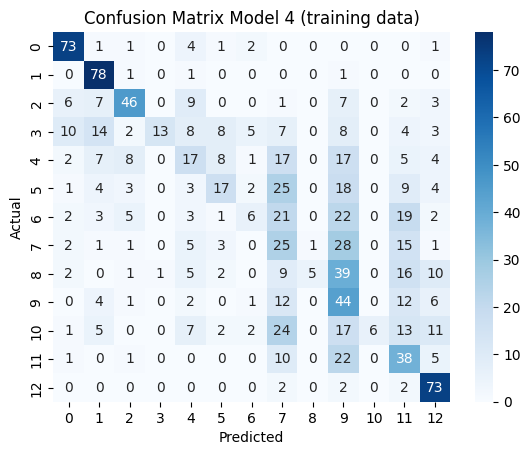

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        83
           7       0.63      0.96      0.76        81
           8       0.66      0.57      0.61        81
           9       0.93      0.16      0.27        82
          10       0.27      0.20      0.23        86
          11       0.40      0.20      0.27        86
          12       0.32      0.07      0.12        84
          13       0.16      0.30      0.21        82
          14       0.83      0.06      0.10        90
          15       0.20      0.54      0.29        82
          16       1.00      0.07      0.13        88
          17       0.28      0.49      0.36        77
          18       0.59      0.92      0.72        79

    accuracy                           0.41      1081
   macro avg       0.54      0.42      0.37      1081
weighted avg       0.54      0.41      0.37      1081



In [28]:
sns.heatmap(confusion_matrix(y_train, y_pred4), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Model 4 (training data)')
plt.show()
print(classification_report(y_train, y_pred4))